In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Train Data

Getting to know about the data, size, info etc.

In [2]:
benz_train = pd.read_csv('train_benz.csv')

In [3]:
benz_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
benz_train.shape

(4209, 378)

In [5]:
benz_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
benz_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [7]:
benz_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

Checikng for null and unique

In [8]:
benz_train.isnull().sum(axis=0)

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [9]:
benz_train.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 378, dtype: int64

Removing ID as it is not required

In [10]:
benz_train.drop(columns = 'ID',inplace = True)

Checking for variance  and removing columns which have 0 variance. Basically unique value as 1 can removed.

In [11]:
benz_train = benz_train.loc[:,benz_train.nunique() != 1]

In [12]:
#Check for shape
benz_train.shape

(4209, 365)

In [13]:
benz_train.describe()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
benz_train.var()

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\2200807739.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  benz_train.var()


y       160.766710
X10       0.013131
X12       0.069457
X13       0.054623
X14       0.244893
           ...    
X380      0.008015
X382      0.007547
X383      0.001661
X384      0.000475
X385      0.001424
Length: 357, dtype: float64

In [15]:
#Check for null values just to make sure
benz_train.loc[benz_train.isnull().sum(axis=1) > 0]

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


Separating Target value from the train data set

In [16]:
y = benz_train.pop('y')
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [17]:
X = benz_train

In [18]:
X.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 364, dtype: object

In [19]:
#check for arrayslicing
X.iloc[:, :8].values

array([['k', 'v', 'at', ..., 'u', 'j', 'o'],
       ['k', 't', 'av', ..., 'y', 'l', 'o'],
       ['az', 'w', 'n', ..., 'x', 'j', 'x'],
       ...,
       ['ak', 'v', 'r', ..., 'aa', 'g', 'e'],
       ['al', 'r', 'e', ..., 'aa', 'l', 'u'],
       ['z', 'r', 'ae', ..., 'aa', 'g', 'w']], dtype=object)

In [20]:
#Check again for slicing to perform label encoding
x_try = X.iloc[:, :8].values
x_try[:,0]

array(['k', 'k', 'az', ..., 'ak', 'al', 'z'], dtype=object)

Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
X0_le = LabelEncoder()
X1_le = LabelEncoder()
X2_le = LabelEncoder()
X3_le = LabelEncoder()
X4_le = LabelEncoder()
X5_le = LabelEncoder()
X6_le = LabelEncoder()
X8_le = LabelEncoder()
X.iloc[:, 0] = X0_le.fit_transform(X.iloc[:, 0].values)
X.iloc[:, 1] = X1_le.fit_transform(X.iloc[:, 1].values)
X.iloc[:, 2] = X2_le.fit_transform(X.iloc[:, 2].values)
X.iloc[:, 3] = X3_le.fit_transform(X.iloc[:, 3].values)
X.iloc[:, 4] = X4_le.fit_transform(X.iloc[:, 4].values)
X.iloc[:, 5] = X5_le.fit_transform(X.iloc[:, 5].values)
X.iloc[:, 6] = X6_le.fit_transform(X.iloc[:, 6].values)
X.iloc[:, 7] = X8_le.fit_transform(X.iloc[:, 7].values)

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\3040364726.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 0] = X0_le.fit_transform(X.iloc[:, 0].values)
C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\3040364726.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 1] = X1_le.fit_transform(X.iloc[:, 1].values)
C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\3040364726.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace inste

Check for data details again after label encoding

In [22]:
#Check for data
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X0 to X385
dtypes: int32(8), int64(356)
memory usage: 11.6 MB


In [24]:
X.dtypes

X0      int32
X1      int32
X2      int32
X3      int32
X4      int32
        ...  
X380    int64
X382    int64
X383    int64
X384    int64
X385    int64
Length: 364, dtype: object

In [25]:
X.nunique()

X0      47
X1      27
X2      44
X3       7
X4       4
        ..
X380     2
X382     2
X383     2
X384     2
X385     2
Length: 364, dtype: int64

Dimensionality Reduction

Using 10, 100 componenets  and plotting it see for optimal dimension

In [26]:
from sklearn.decomposition import PCA
n_components = 10
pca_10 = PCA(n_components=n_components)
X_pca_10 = pca_10.fit_transform(X)

In [27]:
X_pca_10

array([[  0.6147646 ,  -0.13300945,  15.62446002, ...,   1.53768625,
         -0.64765815,   1.73758246],
       [  0.56540665,   1.56033294,  17.9095812 , ...,   0.81257045,
         -0.78933815,  -0.13665822],
       [ 16.20171258,  12.29284626,  17.6335395 , ...,   1.58067974,
         -0.60810269,  -0.48515245],
       ...,
       [ 29.00466039,  14.86090532,  -7.75333217, ...,  -0.25296879,
          0.2645821 ,  -1.09565164],
       [ 22.97242171,   1.68482437,  -9.03124768, ...,   1.71886123,
          2.24091254,   0.25503832],
       [-17.28304831,  -9.95198181,  -3.71935977, ...,   0.79876945,
          0.8051319 ,   0.28693988]])

In [28]:
explained_variance_10 = pca_10.explained_variance_ratio_
explained_variance_10

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604, 0.0074454 , 0.00433701, 0.00294021, 0.00241796])

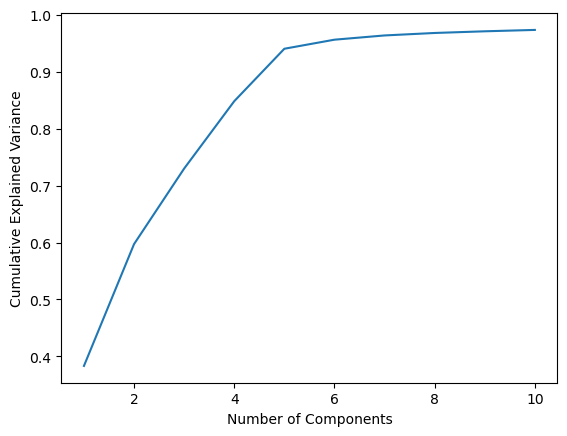

In [29]:
cumulative_variance_10 = explained_variance_10.cumsum()
plt.plot(range(1, len(cumulative_variance_10) + 1), cumulative_variance_10)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Seems like 5 is enough, but lets see for 100 as well to see how it looks

Checkig for 5 to see how it looks

In [30]:
n_components = 5
pca_5 = PCA(n_components=n_components)
X_pca_5 = pca_5.fit_transform(X)

In [31]:
X_pca_5

array([[  0.6147646 ,  -0.13300945,  15.62446002,   3.68756407,
          1.35957377],
       [  0.56540665,   1.56033294,  17.9095812 ,  -0.09290212,
          1.53664826],
       [ 16.20171258,  12.29284626,  17.6335395 ,   0.18630797,
         11.85081968],
       ...,
       [ 29.00466039,  14.86090532,  -7.75333217,  11.22441548,
         -5.84698483],
       [ 22.97242171,   1.68482437,  -9.03124768,   9.74980524,
          9.4495573 ],
       [-17.28304831,  -9.95198181,  -3.71935977,  18.3430963 ,
          8.40170568]])

In [32]:
explained_variance_5 = pca_5.explained_variance_ratio_
explained_variance_5

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008])

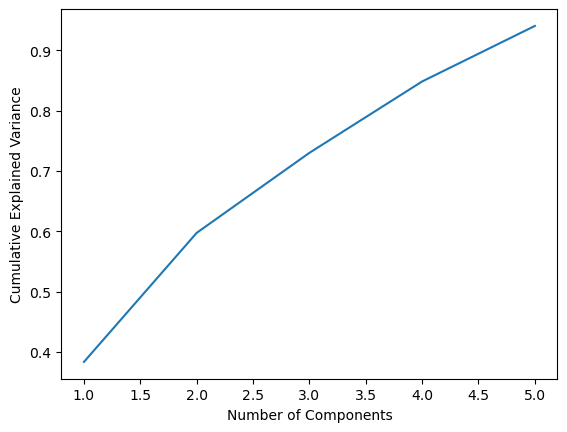

In [33]:
cumulative_variance_5 = explained_variance_5.cumsum()
plt.plot(range(1, len(cumulative_variance_5) + 1), cumulative_variance_5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Check for 100

In [34]:
n_comp_100 = 100
pca_100 = PCA(n_components=n_comp_100)
X_pca_100 = pca_100.fit_transform(X)
X_pca_100

array([[ 6.14764599e-01, -1.33009451e-01,  1.56244600e+01, ...,
         2.32838986e-01, -2.77210489e-01, -3.05942719e-01],
       [ 5.65406646e-01,  1.56033294e+00,  1.79095812e+01, ...,
         3.34739802e-02, -1.70771518e-01,  4.31891849e-02],
       [ 1.62017126e+01,  1.22928463e+01,  1.76335395e+01, ...,
        -1.37250747e-01,  1.10201284e+00, -4.99074165e-01],
       ...,
       [ 2.90046604e+01,  1.48609053e+01, -7.75333217e+00, ...,
         5.03785052e-02,  6.12550195e-02, -5.42666735e-02],
       [ 2.29724217e+01,  1.68482437e+00, -9.03124768e+00, ...,
         1.76389818e-01, -2.52980345e-01, -1.32205250e-02],
       [-1.72830483e+01, -9.95198181e+00, -3.71935977e+00, ...,
        -8.07152402e-02,  1.73049205e-02,  4.20602450e-02]])

In [35]:
exp_var_100 = pca_100.explained_variance_ratio_
exp_var_100

array([3.83347821e-01, 2.13880326e-01, 1.32618659e-01, 1.18266425e-01,
       9.20600842e-02, 1.59060433e-02, 7.44539716e-03, 4.33701278e-03,
       2.94020637e-03, 2.41796178e-03, 2.36488035e-03, 2.03228597e-03,
       1.67203776e-03, 1.48111202e-03, 1.28702378e-03, 1.03575260e-03,
       9.57334243e-04, 8.96963711e-04, 7.85687496e-04, 7.09719878e-04,
       6.44381974e-04, 6.23812984e-04, 5.84619689e-04, 5.12442941e-04,
       4.84778034e-04, 4.33105519e-04, 4.13937269e-04, 3.77641392e-04,
       3.68612369e-04, 3.56074501e-04, 3.29531653e-04, 3.14483888e-04,
       2.99702523e-04, 2.82667164e-04, 2.68166782e-04, 2.48543865e-04,
       2.21385192e-04, 2.14536508e-04, 2.07246665e-04, 1.96497965e-04,
       1.87129240e-04, 1.78741745e-04, 1.75867997e-04, 1.74483468e-04,
       1.70721488e-04, 1.53056232e-04, 1.49449440e-04, 1.43767008e-04,
       1.41453139e-04, 1.38275578e-04, 1.33457860e-04, 1.29756249e-04,
       1.25976751e-04, 1.19332629e-04, 1.14673609e-04, 1.08117735e-04,
      

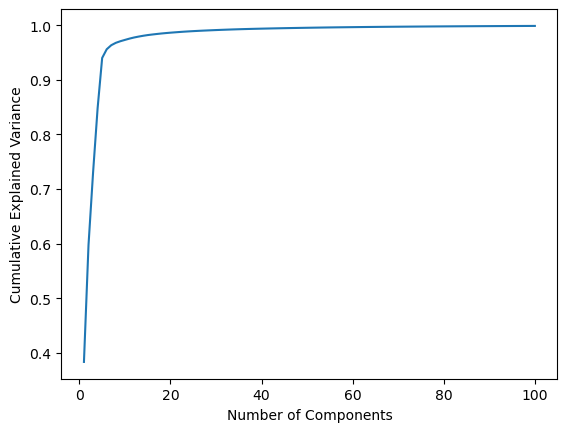

In [36]:
cumulative_var_100 = exp_var_100.cumsum()
plt.plot(range(1, len(cumulative_var_100) + 1), cumulative_var_100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Chck for 6 maku sure if 5 will be the chosen dimension

In [37]:
n_comp_6 = 6
pca_6 = PCA(n_components=n_comp_6)
X_pca_6 = pca_6.fit_transform(X)
X_pca_6

array([[  0.6147646 ,  -0.13300945,  15.62446002,   3.68756407,
          1.35957377,  -2.69141744],
       [  0.56540665,   1.56033294,  17.9095812 ,  -0.09290212,
          1.53664826,  -4.44287654],
       [ 16.20171258,  12.29284626,  17.6335395 ,   0.18630797,
         11.85081968,  -2.155389  ],
       ...,
       [ 29.00466039,  14.86090532,  -7.75333217,  11.22441548,
         -5.84698483,   0.78930645],
       [ 22.97242171,   1.68482437,  -9.03124768,   9.74980524,
          9.4495573 ,  -4.35522826],
       [-17.28304831,  -9.95198181,  -3.71935977,  18.3430963 ,
          8.40170568,   0.50947971]])

In [38]:
exp_var_6 = pca_6.explained_variance_ratio_
exp_var_6

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604])

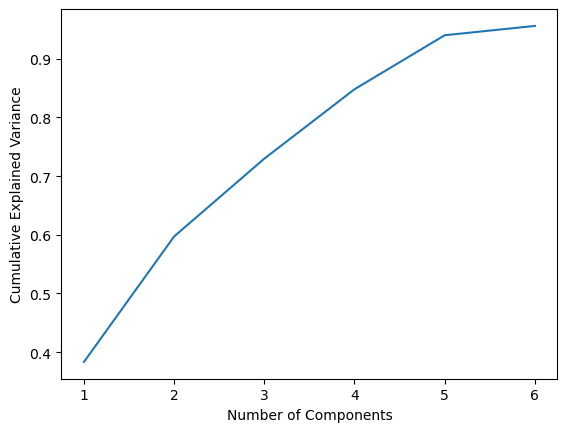

In [39]:
umulative_var_6 = exp_var_6.cumsum()
plt.plot(range(1, len(umulative_var_6) + 1), umulative_var_6)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

As we can see from 5 the graph stays straight, so we will stick to 5

### Test Data

Doing the same process on Test data as it did on Train data

In [40]:
benz_test = pd.read_csv('test_benz.csv')

In [41]:
benz_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
benz_test.shape

(4209, 377)

In [43]:
benz_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [44]:
benz_test.nunique()

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64

In [45]:
benz_test.drop(columns = 'ID',inplace = True)

In [46]:
benz_test = benz_test.loc[:,benz_test.nunique() != 1]
benz_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,t,aa,ai,d,d,aa,j,y,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,y,v,as,f,d,aa,d,w,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,ak,v,as,a,d,aa,c,q,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
benz_test.describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,0.111665,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,0.314992,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
benz_test.var()

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\3672720658.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  benz_test.var()


X10     0.018650
X11     0.000238
X12     0.068851
X13     0.057345
X14     0.244859
          ...   
X380    0.008015
X382    0.008715
X383    0.000475
X384    0.000712
X385    0.001661
Length: 363, dtype: float64

In [49]:
benz_train.loc[benz_train.isnull().sum(axis=1) > 0]

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [50]:
x = benz_test

In [51]:
x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,t,aa,ai,d,d,aa,j,y,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,y,v,as,f,d,aa,d,w,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,ak,v,as,a,d,aa,c,q,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
x.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 371, dtype: object

In [53]:
X0_le = LabelEncoder()
X1_le = LabelEncoder()
X2_le = LabelEncoder()
X3_le = LabelEncoder()
X4_le = LabelEncoder()
X5_le = LabelEncoder()
X6_le = LabelEncoder()
X8_le = LabelEncoder()
x.iloc[:, 0] = X0_le.fit_transform(x.iloc[:, 0].values)
x.iloc[:, 1] = X1_le.fit_transform(x.iloc[:, 1].values)
x.iloc[:, 2] = X2_le.fit_transform(x.iloc[:, 2].values)
x.iloc[:, 3] = X3_le.fit_transform(x.iloc[:, 3].values)
x.iloc[:, 4] = X4_le.fit_transform(x.iloc[:, 4].values)
x.iloc[:, 5] = X5_le.fit_transform(x.iloc[:, 5].values)
x.iloc[:, 6] = X6_le.fit_transform(x.iloc[:, 6].values)
x.iloc[:, 7] = X8_le.fit_transform(x.iloc[:, 7].values)

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\1480528065.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 0] = X0_le.fit_transform(x.iloc[:, 0].values)
C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\1480528065.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1] = X1_le.fit_transform(x.iloc[:, 1].values)
C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_36740\1480528065.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instea

In [54]:
x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 371 entries, X0 to X385
dtypes: int32(8), int64(363)
memory usage: 11.8 MB


In [56]:
x.dtypes

X0      int32
X1      int32
X2      int32
X3      int32
X4      int32
        ...  
X380    int64
X382    int64
X383    int64
X384    int64
X385    int64
Length: 371, dtype: object

In [57]:
t_pca_10 = PCA(n_components = 10)
x_pca_10 = t_pca_10.fit_transform(x)
x_pca_10

array([[ 14.58336173,  14.16672549,  13.53857605, ...,   2.53368957,
         -1.08225334,   0.54985691],
       [-15.25161263,  -7.73675622,  -7.45495093, ...,   1.83972888,
          0.60039425,   0.35196817],
       [ 11.85646482,  -1.68017313,  -9.98961457, ...,   0.73642593,
         -0.0799624 ,   0.63609114],
       ...,
       [-13.44644012,   3.28858211,  -6.85236379, ...,  -0.88554702,
         -2.6290439 ,   0.60321258],
       [ 24.92612306,  -4.89888665, -10.16941016, ...,  -1.8761758 ,
         -0.25065499,  -1.16543634],
       [-15.38430983,  -7.7342545 , -15.49301063, ...,   1.22577251,
          1.75650009,  -1.41249546]])

In [58]:
x_exp_var_10 = t_pca_10.explained_variance_ratio_
x_exp_var_10

array([0.43515102, 0.17670897, 0.13646292, 0.10977912, 0.08622208,
       0.01433962, 0.00722966, 0.00406843, 0.00274007, 0.00228112])

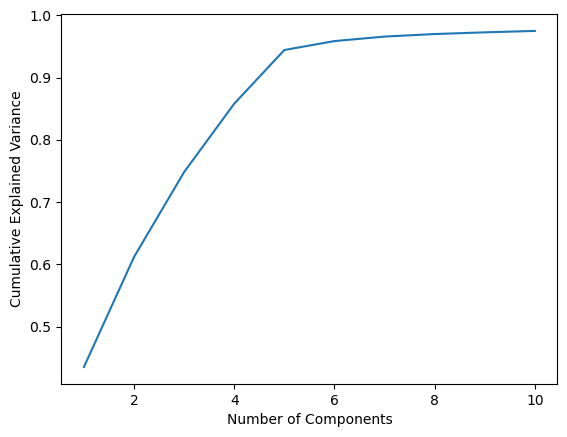

In [59]:
x_cumulative_var_10 = x_exp_var_10.cumsum()
plt.plot(range(1, len(x_cumulative_var_10) + 1), x_cumulative_var_10)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [60]:
t_pca_5 = PCA(n_components = 5)
x_pca_5 = t_pca_5.fit_transform(x)
x_pca_5

array([[ 14.58336173,  14.16672549,  13.53857605,   2.40835821,
         11.31942201],
       [-15.25161263,  -7.73675622,  -7.45495093,  -2.66203409,
         11.5937929 ],
       [ 11.85646482,  -1.68017313,  -9.98961457,  14.91886575,
         -1.08886211],
       ...,
       [-13.44644012,   3.28858211,  -6.85236379,  18.91025666,
         11.32365276],
       [ 24.92612306,  -4.89888665, -10.16941016,  11.44337805,
          5.90178567],
       [-15.38430983,  -7.7342545 , -15.49301063,  -0.5595122 ,
          4.77936357]])

In [61]:
x_exp_var_5 = t_pca_5.explained_variance_ratio_
x_exp_var_5

array([0.43515102, 0.17670897, 0.13646292, 0.10977912, 0.08622208])

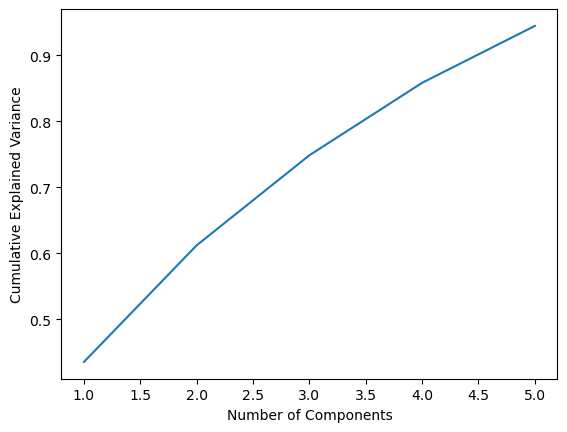

In [62]:
x_cumulative_var_5 = x_exp_var_5.cumsum()
plt.plot(range(1, len(x_cumulative_var_5) + 1), x_cumulative_var_5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [63]:
t_pca_100 = PCA(n_components = 100)
x_pca_100 = t_pca_100.fit_transform(x)
x_pca_100

array([[ 1.45833617e+01,  1.41667255e+01,  1.35385760e+01, ...,
         1.46857895e-01, -4.41408556e-02, -3.32595669e-01],
       [-1.52516126e+01, -7.73675622e+00, -7.45495093e+00, ...,
         3.96688637e-02,  2.39057370e-02, -2.57862402e-02],
       [ 1.18564648e+01, -1.68017313e+00, -9.98961457e+00, ...,
         2.50460913e-02, -5.58607813e-02,  1.93139595e-01],
       ...,
       [-1.34464401e+01,  3.28858211e+00, -6.85236379e+00, ...,
         9.12641270e-02,  5.63582726e-03,  1.53098431e-01],
       [ 2.49261231e+01, -4.89888665e+00, -1.01694102e+01, ...,
        -7.34985485e-02, -6.87189345e-02,  2.79100655e-02],
       [-1.53843098e+01, -7.73425450e+00, -1.54930106e+01, ...,
        -5.39809458e-02,  1.15799376e-02,  8.54252481e-03]])

In [64]:
x_exp_var_100 = t_pca_100.explained_variance_ratio_
x_exp_var_100

array([4.35151022e-01, 1.76708968e-01, 1.36462922e-01, 1.09779117e-01,
       8.62220781e-02, 1.43396216e-02, 7.22965696e-03, 4.06842812e-03,
       2.74007140e-03, 2.28112005e-03, 2.21525436e-03, 1.82720604e-03,
       1.58124816e-03, 1.38440129e-03, 1.20790398e-03, 9.97167275e-04,
       8.91795020e-04, 8.24607687e-04, 7.23298022e-04, 6.55857504e-04,
       6.23926523e-04, 5.77429565e-04, 5.42156140e-04, 4.91813339e-04,
       4.34843220e-04, 4.13378756e-04, 3.82879996e-04, 3.62363287e-04,
       3.49085124e-04, 3.41600355e-04, 3.15086765e-04, 2.88150900e-04,
       2.82298929e-04, 2.65460793e-04, 2.38987855e-04, 2.35859891e-04,
       2.18633351e-04, 2.09799367e-04, 1.91832245e-04, 1.77293360e-04,
       1.73109380e-04, 1.70887006e-04, 1.60892827e-04, 1.56701652e-04,
       1.48468242e-04, 1.40018361e-04, 1.38731955e-04, 1.35633370e-04,
       1.31786808e-04, 1.29924779e-04, 1.23235025e-04, 1.19288475e-04,
       1.13167793e-04, 1.09946613e-04, 1.09371135e-04, 9.91240654e-05,
      

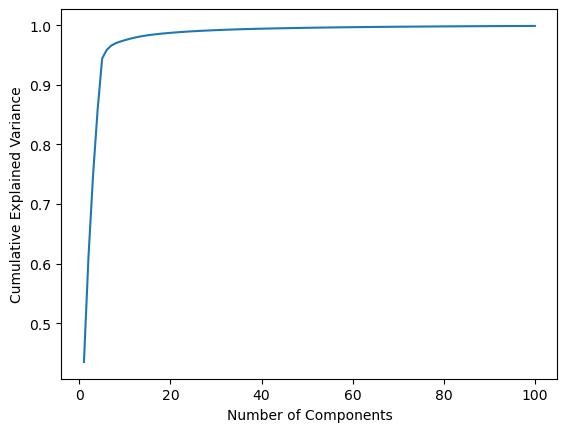

In [65]:
x_cumulative_var_100 = x_exp_var_100.cumsum()
plt.plot(range(1, len(x_cumulative_var_100) + 1), x_cumulative_var_100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [66]:
t_pca_6 = PCA(n_components = 6)
x_pca_6 = t_pca_6.fit_transform(x)
x_pca_6

array([[ 14.58336173,  14.16672549,  13.53857605,   2.40835821,
         11.31942201,   6.94220707],
       [-15.25161263,  -7.73675622,  -7.45495093,  -2.66203409,
         11.5937929 ,   1.15940392],
       [ 11.85646482,  -1.68017313,  -9.98961457,  14.91886575,
         -1.08886211,  -2.69130442],
       ...,
       [-13.44644012,   3.28858211,  -6.85236379,  18.91025666,
         11.32365276,   3.22410199],
       [ 24.92612306,  -4.89888665, -10.16941016,  11.44337805,
          5.90178567,   4.55323254],
       [-15.38430983,  -7.7342545 , -15.49301063,  -0.5595122 ,
          4.77936357,   1.08291178]])

In [67]:
x_exp_var_6 = t_pca_6.explained_variance_ratio_
x_exp_var_6

array([0.43515102, 0.17670897, 0.13646292, 0.10977912, 0.08622208,
       0.01433962])

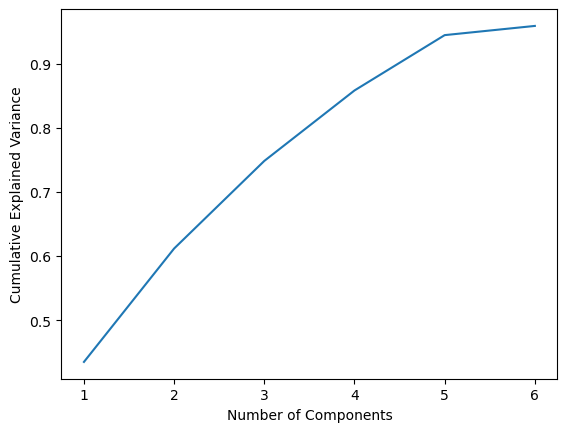

In [68]:
x_cumulative_var_6 = x_exp_var_6.cumsum()
plt.plot(range(1, len(x_cumulative_var_6) + 1), x_cumulative_var_6)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Seems like 5 suits for test data as well

Train X and Test x

In [69]:
X_pca_5

array([[  0.6147646 ,  -0.13300945,  15.62446002,   3.68756407,
          1.35957377],
       [  0.56540665,   1.56033294,  17.9095812 ,  -0.09290212,
          1.53664826],
       [ 16.20171258,  12.29284626,  17.6335395 ,   0.18630797,
         11.85081968],
       ...,
       [ 29.00466039,  14.86090532,  -7.75333217,  11.22441548,
         -5.84698483],
       [ 22.97242171,   1.68482437,  -9.03124768,   9.74980524,
          9.4495573 ],
       [-17.28304831,  -9.95198181,  -3.71935977,  18.3430963 ,
          8.40170568]])

In [70]:
x_pca_5

array([[ 14.58336173,  14.16672549,  13.53857605,   2.40835821,
         11.31942201],
       [-15.25161263,  -7.73675622,  -7.45495093,  -2.66203409,
         11.5937929 ],
       [ 11.85646482,  -1.68017313,  -9.98961457,  14.91886575,
         -1.08886211],
       ...,
       [-13.44644012,   3.28858211,  -6.85236379,  18.91025666,
         11.32365276],
       [ 24.92612306,  -4.89888665, -10.16941016,  11.44337805,
          5.90178567],
       [-15.38430983,  -7.7342545 , -15.49301063,  -0.5595122 ,
          4.77936357]])

XGBoost Regression

In [71]:
import xgboost as xgb

Using default values

In [72]:
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,subsample=0.9)

In [73]:
xgbr.fit(X_pca_5,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [74]:
y_pred = xgbr.predict(x_pca_5)
y_pred

array([ 79.899315,  97.10402 ,  99.43609 , ..., 102.24891 , 111.392235,
        97.65407 ], dtype=float32)

In [75]:
x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


Adding predicted y data to x test data

In [76]:
x['y_pred'] = y_pred

In [77]:
x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y_pred
0,21,23,34,5,3,26,0,22,0,0,...,0,0,1,0,0,0,0,0,0,79.899315
1,42,3,8,0,3,9,6,24,0,0,...,0,1,0,0,0,0,0,0,0,97.104019
2,21,23,17,5,3,0,9,9,0,0,...,0,0,1,0,0,0,0,0,0,99.436089
3,21,13,34,5,3,31,11,13,0,0,...,0,0,1,0,0,0,0,0,0,95.667183
4,45,20,17,2,3,30,8,12,0,0,...,0,0,0,0,0,0,0,0,0,107.695900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,107.301903
4205,42,1,8,3,3,1,9,24,0,0,...,1,0,0,0,0,0,0,0,0,98.819954
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,102.248909
4207,7,23,17,0,3,1,2,16,0,0,...,0,1,0,0,0,0,0,0,0,111.392235


In [78]:
len(y_pred)

4209

y pred has the same rows as the test data.
y has been predicted successfully using XGBoost